# TFM - Evaluaci√≥n de la calidad del dato - EvaluadorTFM.ipynb

### Datos del autor
Notebook elaborado por: **C√©sar Fernando Balaguer Garc√≠a** y **Antonio Lu√≠s Almira Mart√≠nez** en el marco de la tesis de M√°ster Universitario en **An√°lisis y Visualizaci√≥n de Datos Masivos / Visual Analytic y Big Data** (2025). <br>
Asesora de tesis: **Mar√≠a Bel√©n Benalc√°zar Tovar**. <br>
T√≠tulo: **Marco Metodol√≥gico que permita medir la calidad de los datos de un conjunto de datos en formatos planos**.

## 1. Preparaci√≥n del entorno
En este punto se realiza la carga de las librer√≠as y funciones necesarias para la evaluaci√≥n de la calidad de los datos, 

### 1.1 Carga las librer√≠as necesarias para la evaluaci√≥n

In [1]:
#!pip install numpy==1.26.0 --only-binary :all:

In [2]:
## !pip install squarify

In [3]:
#!pip install sweetviz

In [4]:
#!pip install ipywidgets

In [5]:
import importlib
import FuncionesTFM as tfm
from IPython.display import display, clear_output
clear_output(wait=True)

Carga la librer√≠a principal para la medici√≥n de la calidad de un conjunto de datos (Elaboraci√≥n propia)

In [6]:
importlib.reload(tfm)

<module 'FuncionesTFM' from 'C:\\Users\\iyari\\Documents\\pp\\TFM\\FuncionesTFM.py'>

## 2. Evaluaci√≥n del conjunto de datos
En este punto se recorrer√° la lista con la configuraci√≥n realizada en el paso previo y por cada registro existente en la lista se ejecutar√° el evaluador, para poder lograr esto se va a crear una funci√≥n por cada dimensi√≥n, esta funci√≥n devolver√° el porcentaje de calidad del dato, el resultado de cada una de las dimensiones - datos evaluados se almacenar√°n en una colecci√≥n y luego se guardat√°n en un archivo con formato **CSV** para que pueda ser visualizado desde un archivo Excel o para tener el registro de la evaluaci√≥n realizada.

### 2.1 Secci√≥n de carga y preparaci√≥n

Carga de los archivos necesrios para la evaluaci√≥n de la calidad de datos:
>- **archivo_data**: conjunto de datos a evaluar, el archivo se dene encontrar en formato csv.
>- **archivo_parametro**: archivo de configuraci√≥n registrado previamente.
>

In [7]:
nombre_archivo, configuraciones, df_data, df_parametro = tfm.CARGA_PARAMETRIA()

CONJUNTO DE DATOS Y NOMBRE DE CAMPOS A EVALUAR

72963.csv
['Type of indicator', 'Activity branches', 'Period', 'Total']

CONFIGURACI√ìN REGISTRADA

Encabezado                Dimensi√≥n       Validador                                     Umbral Min Umbral Acep
---------------------------------------------------------------------------------------------------------
Type of indicator         Completitud                                                        100.0      100.0
Activity branches         Completitud                                                        100.0      100.0
Period                    Completitud                                                        100.0      100.0
Total                     Completitud                                                        100.0      100.0
Type of indicator, Acti   Unicidad                                                           100.0      100.0
Period                    Consistencia    yyyy                                      

### 2.2 Secci√≥n principal
En esta secci√≥n se recorre la colecci√≥n de configuraci√≥n y por cada registro llama a la funci√≥n correspondiente para la dimensi√≥n requerida por validar, finalmente el resultado de cada fila recorrida ser√° almacenada en una colecci√≥n "**resultado**" donde se tendr√°n los siguientes datos:
>- Campo: Nombre del campo o columna del dataset que se eval√∫a
>- Dimensi√≥n: Nombre de la dimensi√≥n de la calidad o caracter√≠stica del dato que es evaluada
>- Umbral m√≠nimo: Porcentaje m√≠nimo requerido para que el dato pueda considerarse aceptable
>- Umbral aceptable: L√≠mite superior considerado para que un dato pueda ser considerado aceptable
>- Calidad: Resultado cuantitativo de la evaluaci√≥n de la calidad, el resultado obtenido nos dar√° una evaluaci√≥n cualitativa de la evaluaci√≥n de la calidad bajo el siguiente esquema:
>>- Dato no aceptado: El dato se considera como no aceptado cuando el resultado cuantitativo de la calidad se encuentra por debajo del umbral m√≠nimo de aceptaci√≥n
>>- Dato aceptable: Se considera un dato aceptable cuando el valor cuantitativo de la calidad se encuentra enmarcado entre el umbral m√≠nimo y el umbral aceptable
>>- Dato con calidad demostrada: Se considera un dato con calidad demostrada cuando el valor cuantitativo de la calidad es mayor o igual al umbral aceptable.

In [8]:
resultado = tfm.EVALUADOR(configuraciones, df_data)

RESULTADOS EVALUACI√ìN DE LA CALIDAD
-----------------------------------

MEDICI√ìN DE LA CALIDAD POR CAMPO Y DIMENSI√ìN

 S    Campo                       Dimension            Calidad        Umbral Min      Umbral Acep    Resultado                                                             
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
üü¢   Type of indicator         | Completitud     |     100.00% |        100.00% |         100.00% | El porcentaje de calidad sobre el umbral aceptable
üü¢   Activity branches         | Completitud     |     100.00% |        100.00% |         100.00% | El porcentaje de calidad sobre el umbral aceptable
üü¢   Period                    | Completitud     |     100.00% |        100.00% |         100.00% | El porcentaje de calidad sobre el umbral aceptable
üü¢   Total                     | Completitud     |     100.00% |        10

In [9]:
tfm.MAPA_CALOR(resultado)

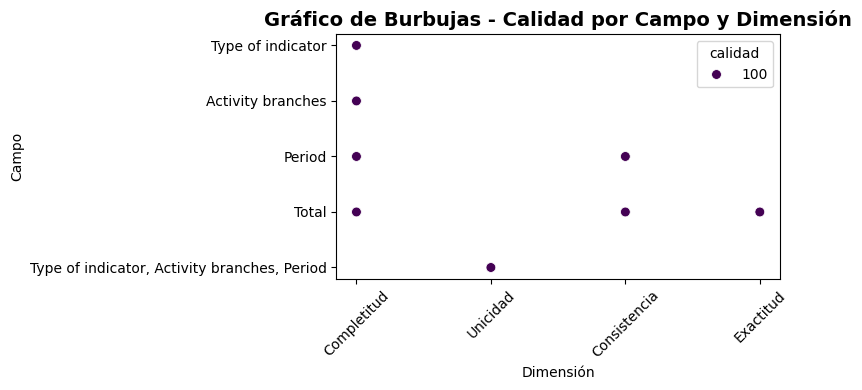

In [10]:
tfm.DIAGRAMA_BURBUJAS(resultado)

In [11]:
tfm.DIAGRAMA_RADAR(resultado)

In [12]:
tfm.DIAGRAMA_BARRAS_DIMENSION(resultado)

In [13]:
tfm.DIAGRAMA_PIE(resultado)

In [14]:
tfm.DIAGRAMA_BARRA_CAMPOS(resultado)

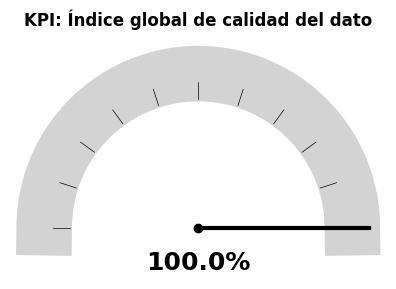

In [15]:
tfm.DIAGRAMA_KPI(resultado)

## 3. Informe final
El evaluador de la calidad de los datos genera un informe final, donde se muestra la siguiente informaci√≥n:
>- Tabla de resultados incluida la semaforizaci√≥n de la calidad de los datos
>- Graficos de apoyo
>>- Diagrama de radar
>>- Diagrama de dona
>>- Diagrama de burbuja
>>
>
Sobre estos diagramas se pueden a√±adir otros m√°s como soporte a los ya mostrados.

In [16]:
tfm.GENERAR_PDF_COMPLETO(resultado,nombre_archivo)

‚úÖ PDF generado correctamente


In [17]:
tfm.DOSSIER(df_data, nombre_archivo)

‚úÖ Dossier generado correctamente: 72963.html
